In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [26]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar100.load_data()
x_train=(x_train)/255.0
x_test=(x_test)/255.0
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
x_train[0].min(),x_train[0].max()

(0.00392156862745098, 1.0)

In [27]:
class_labels={
0: 'apple',
1: 'aquarium_fish',
2: 'baby',
3: 'bear',
4: 'beaver',
5: 'bed',
6: 'bee',
7: 'beetle',
8: 'bicycle',
9: 'bottle',
10: 'bowl',
11: 'boy',
12: 'bridge',
13: 'bus',
14: 'butterfly',
15: 'camel',
16: 'can',
17: 'castle',
18: 'caterpillar',
19: 'cattle',
20: 'chair',
21: 'chimpanzee',
22: 'clock',
23: 'cloud',
24: 'cockroach',
25: 'couch',
26: 'crab',
27: 'crocodile',
28: 'cup',
29: 'dinosaur',
30: 'dolphin',
31: 'elephant',
32: 'flatfish',
33: 'forest',
34: 'fox',
35: 'girl',
36: 'hamster',
37: 'house',
38: 'kangaroo',
39: 'keyboard',
40: 'lamp',
41: 'lawn_mower',
42: 'leopard',
43: 'lion',
44: 'lizard',
45: 'lobster',
46: 'man',
47: 'maple_tree',
48: 'motorcycle',
49: 'mountain',
50: 'mouse',
51: 'mushroom',
52: 'oak_tree',
53: 'orange',
54: 'orchid',
55: 'otter',
56: 'palm_tree',
57: 'pear',
58: 'pickup_truck',
59: 'pine_tree',
60: 'plain',
61: 'plate',
62: 'poppy',
63: 'porcupine',
64: 'possum',
65: 'rabbit',
66: 'raccoon',
67: 'ray',
68: 'road',
69: 'rocket',
70: 'rose',
71: 'sea',
72: 'seal',
73: 'shark',
74: 'shrew',
75: 'skunk',
76: 'skyscraper',
77: 'snail',
78: 'snake',
79: 'spider',
80: 'squirrel',
81: 'streetcar',
82: 'sunflower',
83: 'sweet_pepper',
84: 'table',
85: 'tank',
86: 'telephone',
87: 'television',
88: 'tiger',
89: 'tractor',
90: 'train',
91: 'trout',
92: 'tulip',
93: 'turtle',
94: 'wardrobe',
95: 'whale',
96: 'willow_tree',
97: 'wolf',
98: 'woman',
99: 'worm'
}

In [28]:
def show_images(images,labels,preds=False):
    fig=plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    plt.style.use('ggplot')
    for idx in range(images.shape[0]):
        plt.subplot(4,8,idx+1)
        img=images[idx]
        plt.imshow(img)
        if preds:
            plt.title(class_labels[np.argmax(labels[idx])])
        else:
            plt.title(class_labels[labels[idx].item()])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
data_augmentation=Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomTranslation(width_factor=.4,height_factor=.4),
    tf.keras.layers.RandomContrast(.15),
    tf.keras.layers.RandomRotation(.06),
    tf.keras.layers.RandomZoom(.2),
])

In [31]:
train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_data=train_data.cache()
train_data=train_data.shuffle(50000)
train_data=train_data.batch(128)
train_data=train_data.map(lambda x,y:(data_augmentation(x),y))
train_data=train_data.prefetch(64)

test_data=tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_data=test_data.batch(32)
test_data=test_data.prefetch(16)

In [32]:
train_iterator=train_data.as_numpy_iterator()

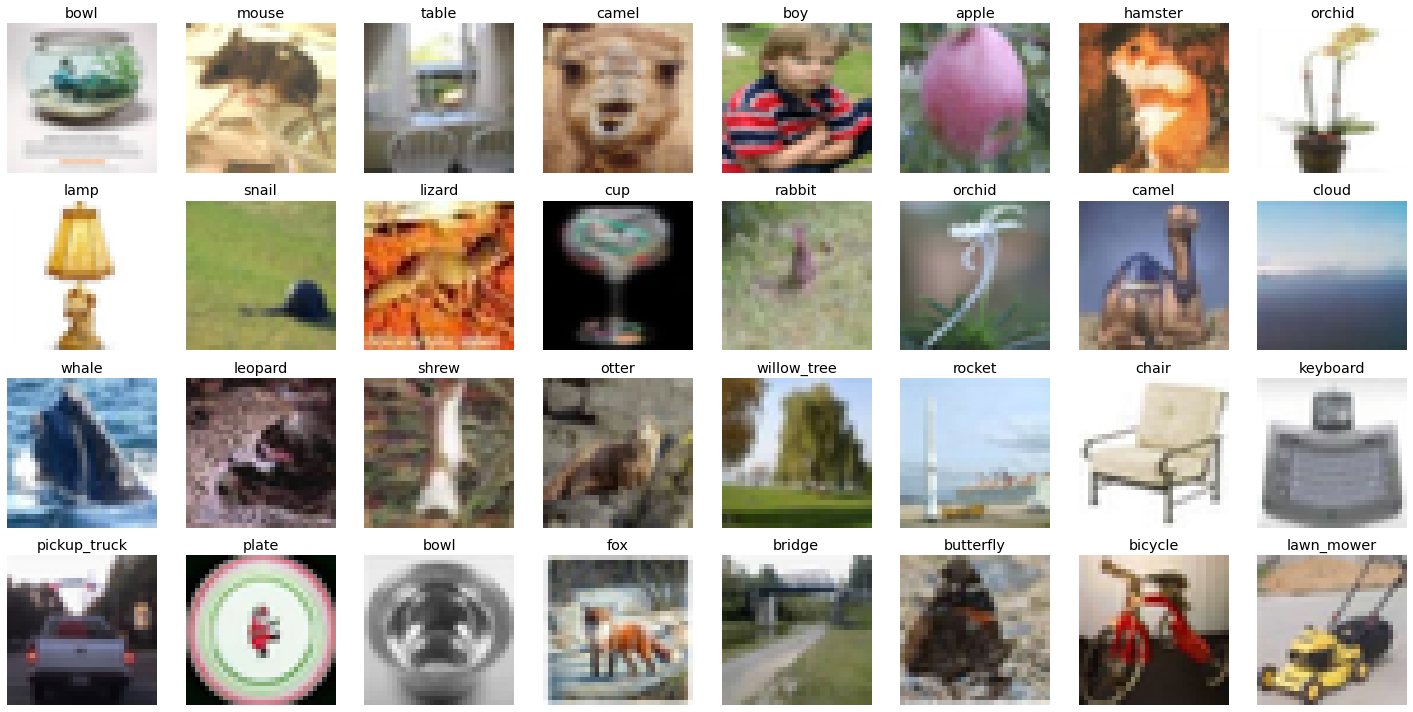

In [11]:
images,labels=train_iterator.next()
show_images(images[:32],labels[:32])

In [33]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPool2D
from tensorflow.keras import Input,Model

In [34]:
def build_model():
    inputs=Input(shape=(32,32,3),name='input_layer')
    x=Conv2D(64,(3,3),1,padding='same',activation='relu')(inputs)
    x=BatchNormalization()(x)
    x=Conv2D(64,(3,3),1,padding='same',activation='relu')(x)
    x=BatchNormalization()(x)

    x=Conv2D(128,(3,3),1,padding='same',activation='relu')(x)
    x=BatchNormalization()(x)
    x=Conv2D(128,(3,3),1,padding='same',activation='relu')(x)
    x=BatchNormalization()(x)
    x=MaxPool2D()(x)

    x=Conv2D(192,(3,3),1,padding='same',activation='relu')(x)
    x=BatchNormalization()(x)
    x=Conv2D(192,(3,3),1,padding='same',activation='relu')(x)
    x=BatchNormalization()(x)
    x=MaxPool2D()(x)

    x=Flatten()(x)
    x=Dropout(.2)(x)
    x=Dense(512,activation='relu')(x)
    x=BatchNormalization()(x)
    x=Dropout(.2)(x)
    outputs=Dense(100,activation='softmax')(x)

    model=Model(inputs=inputs,outputs=outputs,name='cifar100_model')
    return model

In [35]:
model=build_model()
model.summary()

Model: "cifar100_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 128)    

In [36]:
model=tf.keras.models.load_model(os.path.join('models','cifar100_model.h5'))

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [16]:
history=model.fit(train_data,epochs=60,validation_data=test_data,callbacks=[tf.keras.callbacks.TensorBoard(log_dir='logs')])

Epoch 1/30
391/391 [==============================] - 52s 94ms/step - loss: 4.1662 - accuracy: 0.0811 - val_loss: 4.6182 - val_accuracy: 0.0437
Epoch 2/30
391/391 [==============================] - 37s 96ms/step - loss: 3.7158 - accuracy: 0.1375 - val_loss: 4.0236 - val_accuracy: 0.1232
Epoch 3/30
391/391 [==============================] - 38s 96ms/step - loss: 3.4139 - accuracy: 0.1828 - val_loss: 3.2938 - val_accuracy: 0.2201
Epoch 4/30
391/391 [==============================] - 37s 96ms/step - loss: 3.1683 - accuracy: 0.2268 - val_loss: 3.1491 - val_accuracy: 0.2383
Epoch 5/30
391/391 [==============================] - 37s 94ms/step - loss: 2.9576 - accuracy: 0.2663 - val_loss: 2.9379 - val_accuracy: 0.2752
Epoch 6/30
391/391 [==============================] - 37s 94ms/step - loss: 2.8044 - accuracy: 0.2928 - val_loss: 2.8576 - val_accuracy: 0.2894
Epoch 7/30
391/391 [==============================] - 37s 95ms/step - loss: 2.6653 - accuracy: 0.3221 - val_loss: 2.6001 - val_accuracy:

In [28]:
df=pd.DataFrame(history.history)
df.to_csv('model_loss.csv',index=False)

<Figure size 1440x360 with 0 Axes>

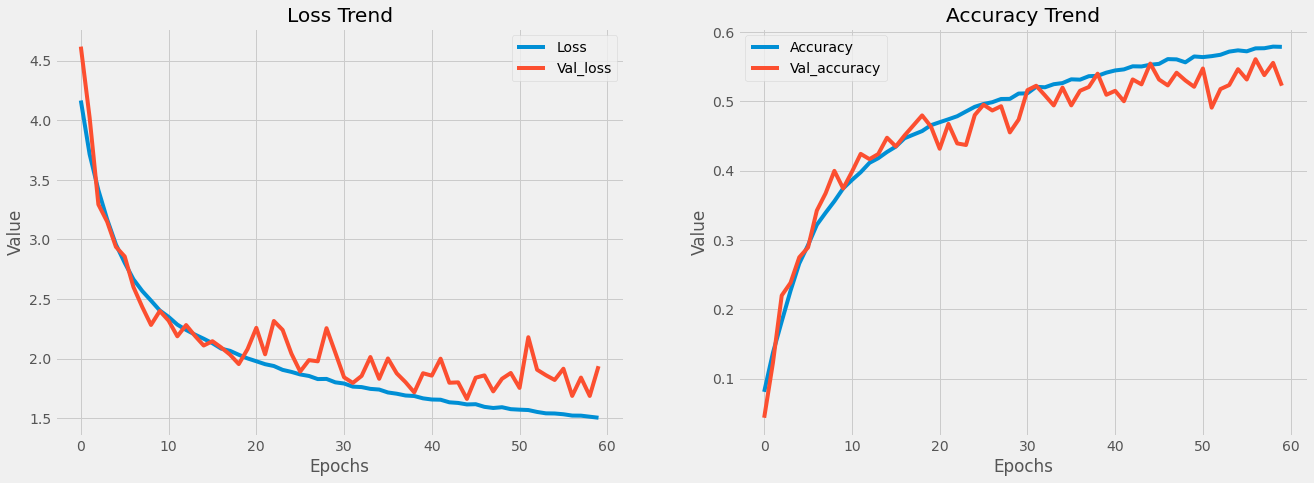

In [17]:
plt.style.use('fivethirtyeight')
df=pd.read_csv('model_loss.csv')
plt.figure(figsize=(20,5))
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,7))
ax1.plot(df['loss'],label='Loss')
ax1.plot(df['val_loss'],label='Val_loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Value')
ax1.set_title('Loss Trend')
ax1.legend()

ax2.plot(df['accuracy'],label='Accuracy')
ax2.plot(df['val_accuracy'],label='Val_accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Value')
ax2.set_title('Accuracy Trend')
ax2.legend()

plt.show()

In [35]:
# tf.keras.models.save_model(model,os.path.join('models','cifar100_model.h5'))
# model.save('./metadata/')

INFO:tensorflow:Assets written to: ./metadata/assets


INFO:tensorflow:Assets written to: ./metadata/assets


## Predictions on training dataset

4/4 [==============================] - 2s 294ms/step


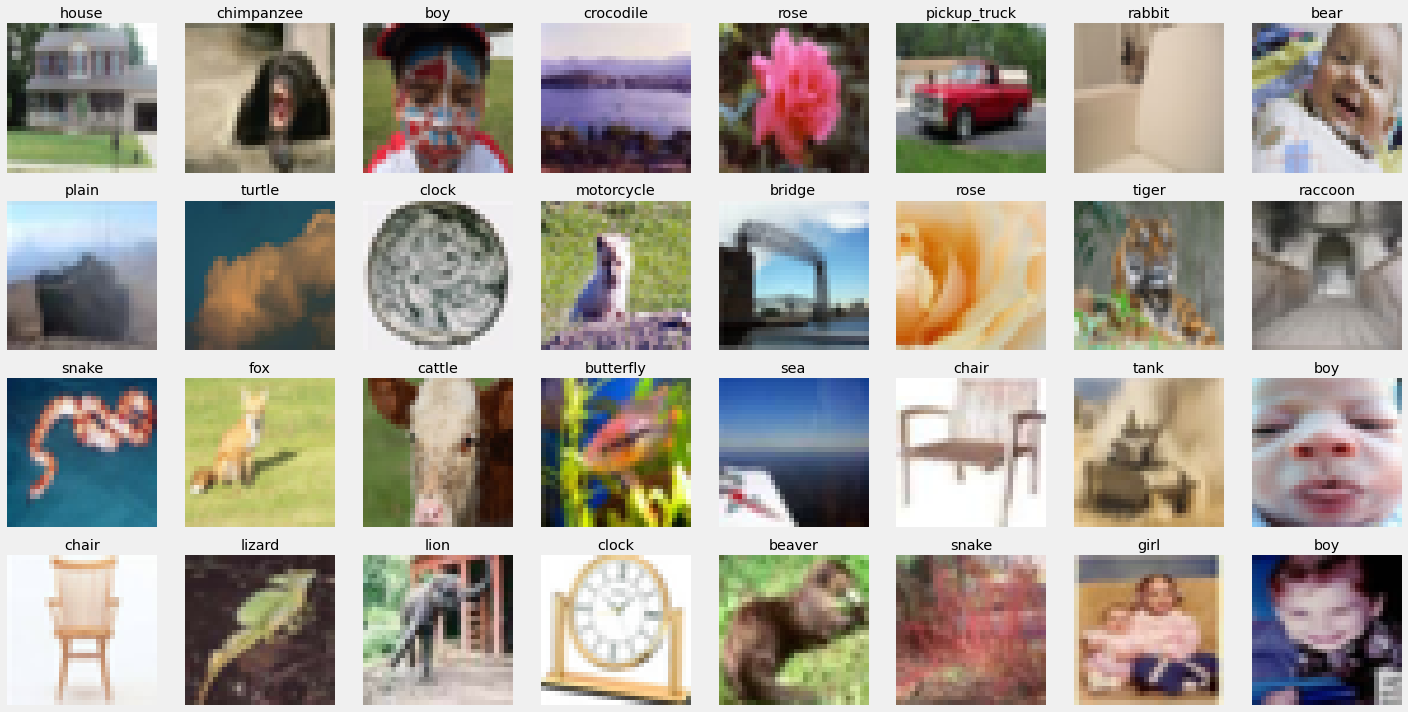

In [18]:
images,labels=train_iterator.next()
pred=model.predict(images)
show_images(images[:32],pred[:32],True)

## Predictions on testing dataset

In [19]:
loss,acc=model.evaluate(x_test,y_test,verbose=0)
print(f'Model Loss: {loss:.4f}')
print(f'Model Accuracy: {acc*100:.3f} %')

Model Loss: 1.6011
Model Accuracy: 57.920 %


In [20]:
preds=model.predict(x_test)

313/313 [==============================] - 84s 268ms/step


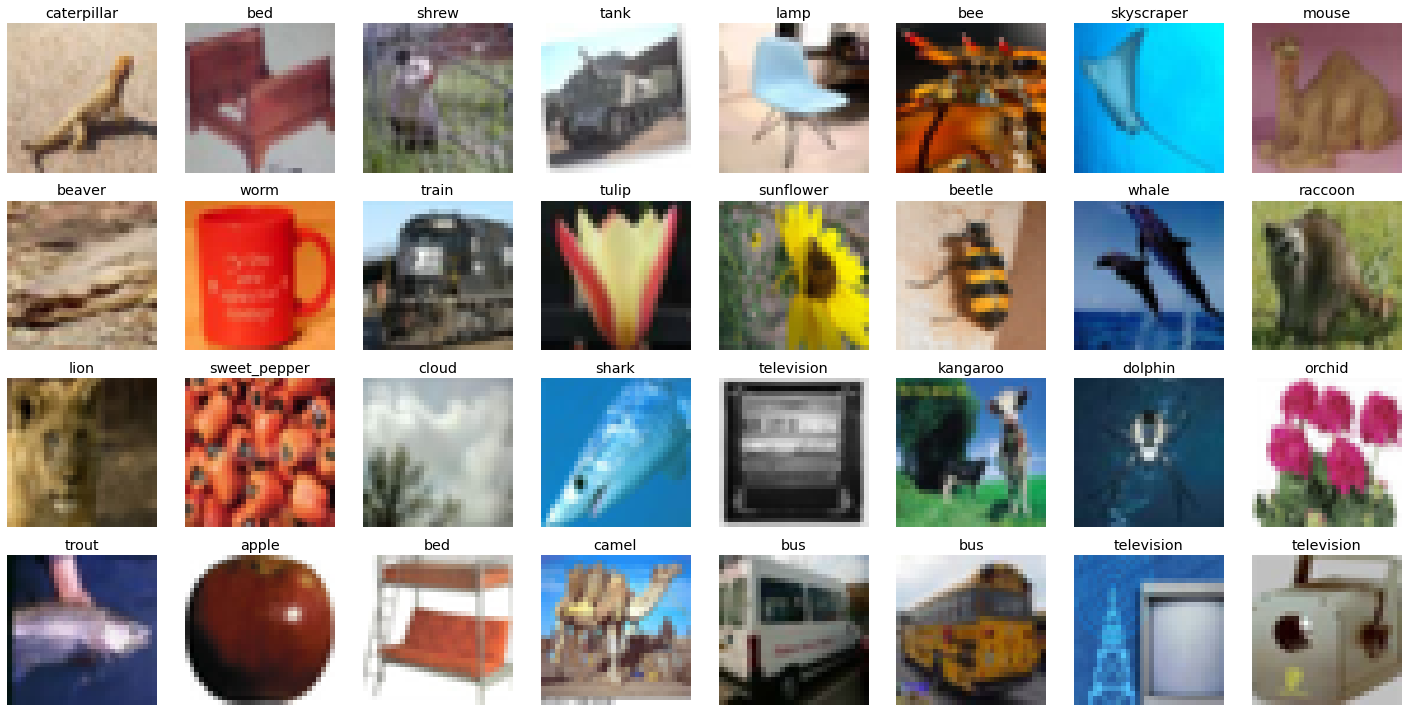

In [21]:
indexes=np.random.randint(0,9999,size=(32,))
images=np.expand_dims(x_test[indexes[0]],axis=0)
pred=np.expand_dims(preds[indexes[0]],axis=0)
for i in range(1,len(indexes)):
    images=np.concatenate([images,np.expand_dims(x_test[indexes[i]],axis=0)],axis=0)
    pred=np.concatenate([pred,np.expand_dims(preds[indexes[i]],axis=0)],axis=0)
show_images(images,pred,True)

## Testing the model on images from internet

In [37]:
import cv2

In [178]:
def plot_prediction(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img/255.0
    small_img=cv2.resize(img,(32,32))
    model_img=np.expand_dims(cv2.resize(small_img,(32,32)),axis=0)
    pred=model.predict(model_img,verbose=0)[0]
    
    df=pd.DataFrame(pred).T
    df=df.sort_values(0,axis=1,ascending=False).T
    df=df[:7].T
    classes=[]
    probs=[]
    for idx in df.columns.values:
        classes.append(class_labels[idx])
        probs.append(df.loc[0,idx])
    plt.style.use('seaborn-pastel')
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(14,4))
    ax1.imshow(img)
    ax1.axis('off')

    ax2.barh(classes,probs,color='purple')
    ax2.set_xlabel('Probability')
    ax2.set_ylabel('Classes')
    plt.tight_layout()
    plt.show()

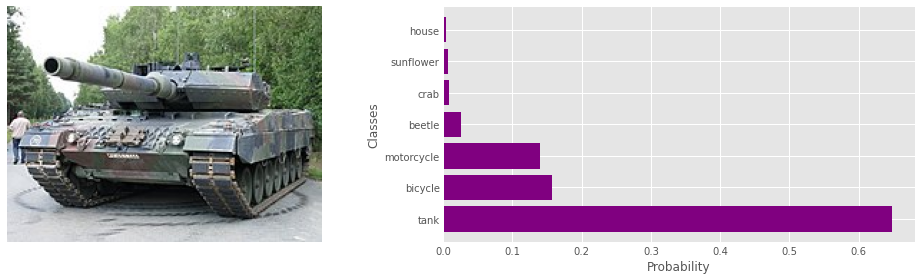

In [179]:
plot_prediction('web images\\tank.jpg')

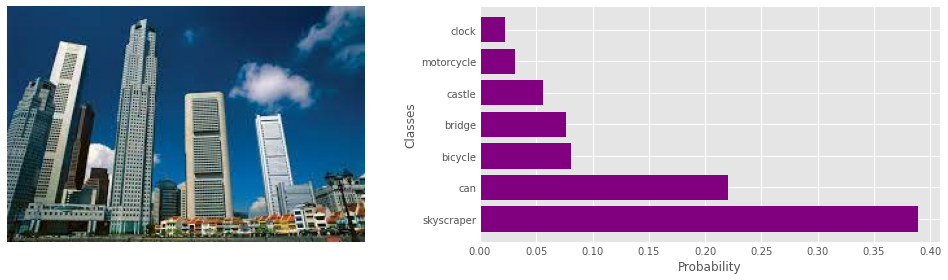

In [180]:
plot_prediction('web images\\skyscraper.jpg')

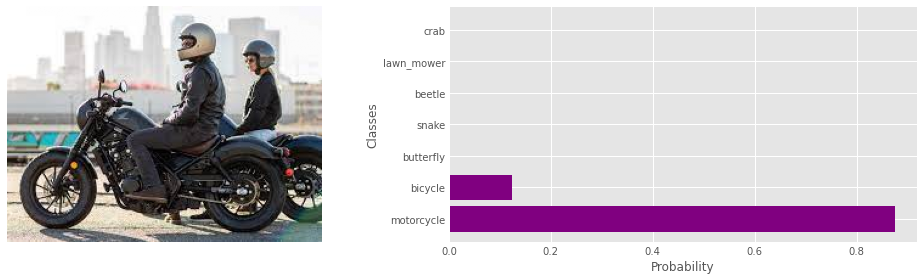

In [187]:
plot_prediction('web images\\motorcycle.jpg')

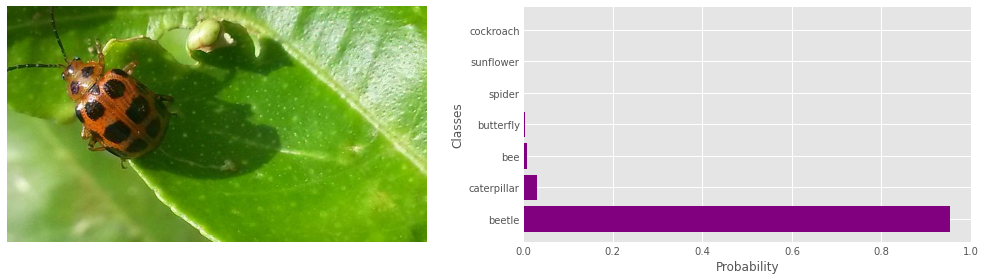

In [190]:
plot_prediction('web images\\beetle.jpg')

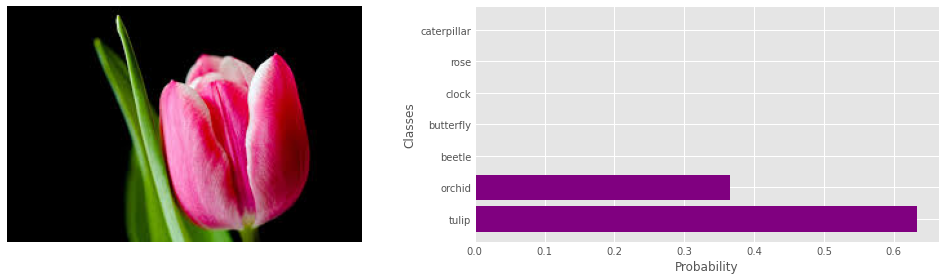

In [192]:
plot_prediction('web images\\tulip.jpg')

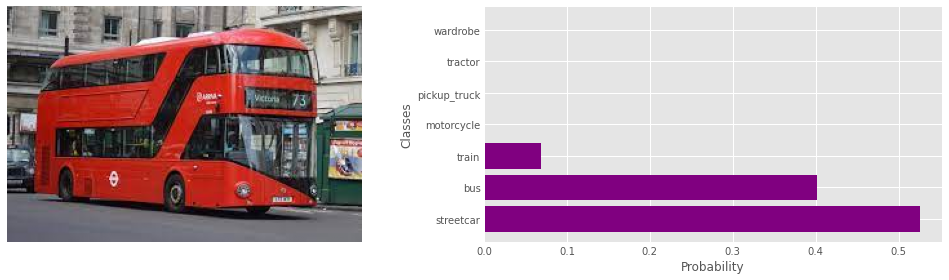

In [200]:
plot_prediction('web images\\bus.jpg')

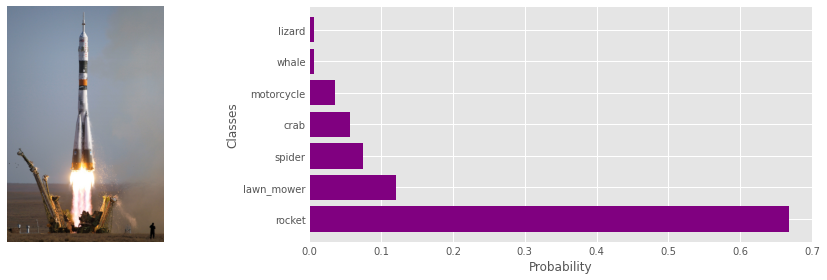

In [205]:
plot_prediction('web images\\rocket.jpg')